# P03 NO2 and NSL

## 1. Introduction
NSL-monitoring (www.nsl-monitoring.nl) is the standardised calculation tool for the National Cooperation for Air Quality), which is an implementation of the national law on air quality (go to http://wetten.overheid.nl/ and search for ‘Regeling Beoordeling Luchtkwaliteit 2007’). It is the official tool which local governments use to simulate the air quality in particular streets, to pinpoint problem areas, where the EU standards for air quality are exceeded, and to report to the national government. The tool results from theoretical constraints, calibration with measurements on many different locations and the need for an objective and user-friendly reporting protocol. Basically the NSL-monitoring is a simple box model. 

<img src="BoxModel.png">

The NSL-monitoring considers each street segment as a single box. The concentration in a box depends on the difference between inflow and outflow, emission and deposition and chemical production and loss. The concentrations of the air moving in or out of the box are not coupled to the concentrations in neighbouring boxes, so there is no exchange between adjacent street segments. This is clearly a simplification, which may be violated in reality. The implicit assumption of using a box model is that the concentrations within the box are well mixed. This is also a simplication, as the concentration of pollutantant may be considerably higher on the downwind side of the street than on the upwind side. However, the NSL-monitoring is developed as a generic tool that does not use detailed meteorological information. The tool also does not pretend to simulate diurnally varying concentrations, it only simulates annual average concentrations. 
The mass balance of a substance in that box can be described using the continuity equation:

$\frac{dm}{dt} = F_{in} - F_{out} + E - D + P - L \,\,\,\,\,(Eq. 1)$

The NSL-monitoring assumes that there is no loss by deposition ($D$ = 0), because the deposition velocity $v_d$ is very low for NO$_2$ and zero for NO. Inside the box vehicles add pollutants by emission $E$, according to the traffic intensity and the emission factors (emission per distance driven) and a few additional factors.  The model assumes that there is equilibrium according to the photostationary state (NO + O$_3$ ↔ NO$_2$ + O$_2$) and no chemical production and loss of NO and NO$_2$ ($P$ = $L$ = 0). The model assumes a background concentration of pollutants in the inflowing air according to GCN maps (Grootschalige Concentratiekaart Nederland, Large-scale Concentration map of the Netherlands, provided by RIVM). The outflow of the pollutant depends on the concentration in the box and the wind speed. In the following, we will separately describe the terms E and Fin-Fout,

This python notebook calculates for a specific receptor point, the concentrations of the air pollutants NO$_2$, PM$_{10}$ and PM$_{2.5}$. Calculations are based on Standard Calculation Method 1 (SCM1, NL: StandaardRekenMethode 1 (SRM1), which is in the Dutch rule of law the prescribed method for calculating annual averages of atmospheric pollutanys for receptor points that are located in urban areas.   

## 2. Emissions
The emission $E$ (μg m-1 s-1) in a street segment is computed from the vehicle intensity N (veh day-1) and the emission per vehicle per driven m, called the emission factor E* (g km-1 veh-1):
 
$E = \frac{1000}{24 \cdot 3600} N E^* \,\,\,\,\,\,\,Eq. 2$

The factor 1000/(24×3600) converts N·E from (g km-1 day-1) to (μg m-1 s-1). The traffic intensity is distributed over a fraction of light vehicles (fl), a fraction of middle heavy vehicles (fm) and fraction of heavy vehicles (fh), each with their own emission factors (El, Em, Eh), because trucks emit more pollutants per driven distance than passenger cars. Busses may be assigned a fraction of their own, or they may be counted as heavy vehicles. 

$E^* = f_l \cdot N_l + f_m \cdot N_m + f_h \cdot N_h\,\,\,\,\,\,\,Eq. 3$

The emission factors depend not only on the vehicle category, but also on their speed. The NSL-monitoring distinguishes 5 speed classes as shown in Table 1. 

Table 1. Speed types in the NSL-monitoring. The code (a) is no longer used, as it is replaced by codes 92-94.
<img src='TableSpeedTypes.PNG'>

A street segment is assigned a single speed type of type A, B, C or E and a fraction of stagnating traffic (Fs):
 
$E = \frac{1000}{24 \cdot 3600}\bigg[ \left(f_l \cdot N_l + f_m \cdot N_m + f_h \cdot N_h \right)\left(1 - F_s\right) + \left(f_l \cdot N_l + f_m \cdot N_m + f_h \cdot N_h\right) F_s  \bigg]\,\,\,\,\,\,\,Eq. 4$

The associated emission factors are given in Table 2.

Table 2. Emission factors El, Em and Eh of NOx, PM10 and NO2 as a function of  road type and speed type and vehicle category, as officially determined by the Dutch national government for 2013.  (http://www.rijksoverheid.nl/onderwerpen/luchtkwaliteit/berekenen-luchtvervuiling). The emission factors are updated annually.
<img src='TableEmissionFactors.PNG'>


## 4. From emission to concentration: Ventilation

### 4.1 Budget equation
In section 3 the methodology for computing the emission rates in street canyons has been explained. But ultimately the NSL-monitoring  is intended to simulate concentrations. The step from emissions to concentration is by realising that the emissions are into a volume V = l×w×h. The mass balance of the pollutant in the volume is:
 
Equation 9.5

This is to say: the concentration changes in time dC/dt (μg m-3 s-1) are caused by emission (E·l, μg s-1) into the box, and by the difference between in- and outflow Fin and Fout (μg s-1).  Because C = m/V, we can multiply both sides of the equation with V to get:
 
Equation 9.6

For simplicity we call (Fin - Fout) / V = T (Transport). Considering that the efficiency of transport depends on the difference in concentration between the background and the box (Cbg-Cbox,  μg m-3) and that the units of T are μg m-3 s-1, we can write T as:
 
Equation 9.7

where τv is the time constant of ventilation. If we assume steady state (dC/dt = 0, the concentration in the box has reached an equilibrium):
 
Equation 9.8

we can solve the equation for Cbox:
 
Equation 9.9

With this equation NSL-monitoring simulates the concentration of the pollutant in the box. It follows that the concentration inside the box depends on the background concentration, on the local emissions, and on the ventilation time constant. The background concentration is taken in NSL-monitoring from the GCN map of the Netherlands (Grootschalige Concentratiekaart Nederland, Largescale Concentration map Netherlands), which is prepared on an annual basis by the RIVM (RijksInstituut voor Volksgezondheid en Milieu, National Institute for Public health and the Environment) in Bilthoven. In the next section we will consider several options for defining τv.

### 4.2 Ventilation rate
<img src='FigureStreetCanyon.png'>
Figure 2. Visualisation of the volume of the box and the ventilation rate.  

Figure 2 schematically shows the ventilation of the street canyon. In this example it is clear that the volume of the street is defined by the height of the buildings and the width of the street, and that the transport of pollutants occurs through the horizontal plane at the top of the volume. In this case, the ventilation takes place by means of turbulent diffusion, and the ventilation time constant can be written as:
 
Equation 9.10

where h is the height of the box and Kz the turbulent diffusion coefficient. Kz is a function of wind speed and the local surface roughness. The presence of vegetation is accounted for by the tree factor (next section). In a typical situation h = 20 m, Kz = 3 m2 s-1, and τv = 400/6 = 67 s.
Fig.  Figure 9.2 shows an example of a street canyon with tall buildings. This situation is also shown  schematically in Fig. Figure 9.3a. In many rural and suburban situations the buildings on either side of the street are absent, intermittent and/or much lower (Fig. Figure 9.3b).   

<img src='FigureTallBuildings.png'><img src='FigureNoBuildings.png'>
Figure 9.3 a) Ventilation occurs through the top boundary of the box. b) Ventilation occurs through the lateral boundaries of the box.
In that case, the ventilation is not through the vertical plane at the top of the (ill-defined) box, but through the lateral boundaries. The ventilation time constant can be expressed as:
 
Equation 9.11

assuming that the wind is perpendicular to the street. In a typical situation where  w = 50 m and u = 2 m s-1, τv = 25 s, which is almost one-third of the τv in the situation with exchange through the top boundary. The concentrations will therefore be much lower in this situation. Obviously, in practise it makes a difference if the wind is really perpendicular to the street or more parallel. NSL-monitoring uses geographically explicit, annual average wind speeds to calculate the concentrations.

### 4.3 Tree factor
8.3.2.	Tree factor
Fig.
Figure 9.2 schematically shows that trees disturb the normal refreshment of the air. As a consequence the emitted pollutants remain below the tree crown longer, and the concentration increases. The NSL-monitoring allows to correct for this effect by introducing the tree factor fT, which is 1.00 for an open street without trees, 1.25 for streets with some trees and 1.5 for streets with a closed tree crown (Fig. Figure 9.4). The tree factor is applied to increase the concentration in the box:
 
Equation 9.12

In this approach it is assumed that trees suppress the ventilation rate more than they filter the pollutants from the air onto the leaves, as such it simulates a net effect. 
<img src='FigureTreeFactor.png'>
Figure 9.4. Guideline for determining the tree factor. 


### 4.3 Road type
The refreshment rate depends on the surface area of the street canyon, A = w · h. To avoid having to measure the height of the neighbouring buildings on each road segment, NSL-monitoring uses a fixed classification of road types, each with a specific ratio of l/h  (Fig. Figure 9.5). As the width and the average wind speed of the street segments is available in the NSL database, the surface area and the refreshment rates can be computed.
For roads outside urbanisations, specific codes have been introduced: 92 for provincial, inter-communal  roads and 93 for highways, and 94 for highways with strict enforcement of the maximum speed by means of road section control or automated cameras. These codes are explicitly used in combination with maximum speed for light and heavy vehicles.

<img src='FigureRoadType.png'>
Figure 9.5. Road types in the NSL-monitoring.


### 4.4.	Other complicating factors
#### 4.4.1.	Crossings
Older versions of the NSL-monitoring accounted for the presence of crossings near the road segment. Near crossings vehicles (should) reduce speed, which would reduce the emission factors by a few percent. This functionality is no longer maintained in the current version of the NSL-monitoring.
#### 4.4.2.	Parking movements
Parking cars often run idle for some time, and often have cold engines. This enhances the emission of some volatile organic compounds, such as benzene. At larger parking lots this may cause exceedence of air quality standards. This functionality is not considered in this practical. 

#### 4.4.3.	Tunnel factor
Road segments may be in a tunnel, where air is refreshed by means of forced ventilation. The ventilation has outlets on either side of the tunnel, so that the pollutant concentration is much higher near the outlets. Road segments near tunnels may be assigned a tunnel factor, which is 0 for roads in tunnels (emission does not affect the air quality of the ambient air outside the tunnel, 1 for normal roads and > 1 for road segments near tunnel outlets.


### 4.5.	Probability of exceedance of air quality standards
NSL-monitoring simulates the annual average concentration of pollutants. This is however, only one of the variables of interest. EU air quality standards often specify a maximum for the annual average concentration, as well as a maximum number of days when a specified daily average concentration may be exceeded. NSL-monitoring computes the exceedances as a function of the average concentration, the standard, and average meteorological conditions. The theory behind the computational routine is that concentration exceedance probabilities are distributed logarithmically around the average concentration: the higher the exceedance, the lower the probability. Although we do not go into detail here, it is worth remembering that the probability of exceedance is estimated in a statistical sense.
 


## 3. Define the characteristics of the receptor point

Now, we are ready to define a receptor point. In the CARII module, a receptor point is given by a python class with the following attributes:
1. RDW-X: x-coordinates according to the Rijksdriehoekmeting RDW
2. RDW-Y: y-coordinates according tot RDW. 
3. Year for which the calculations should be done.

Values can be provided using dropdown menu (year) and via input in text boxes (RDW-X and RDW-Y).

### The National Coordinate System (Rijksdriekhoekscoordinaten)
The National Coordinate System defines X towards the East and Y towards the North in m of a hypothetical point 120 km SW of Paris. As a result, X and Y are always positive and Y is always larger than X. More about the system can be read on https://en.wikipedia.org/wiki/Rijksdriehoeksco%C3%B6rdinaten.

In [1]:
import CARII
import ipywidgets as widgets
import pandas as pd

recep = CARII.receptor()

BoundedFloatText(value=133382.0, description='RDW_x (m East):', layout=Layout(width='300px'), max=280000.0, st…

BoundedFloatText(value=454361.0, description='RDW_y (m North):', layout=Layout(width='300px'), max=640000.0, m…

Dropdown(description='Year', layout=Layout(width='300px'), options=(2020, 2025, 2030), style=DescriptionStyle(…

To calculate the annual averages of concentrations of air pollutants, SRM1 needs:
- a large-scale (background) concentration for the location of the receptor point. These are derived from the Large Scale Concentration Maps Netherlands (GCN: Grootschalige Concentratiekaarten Nederland), which are generated by the RIVM. In the files provided by the RIVM two values are available: one refers is the GCN concentration at the location of the receptor point, while a second refers to the GCN concentration when all contribution from motorways, Hoofdwegennet (HWN in Dutch, that are located up to a distance of 3.5 km are substracted from the GCN-concentration. GCN maps are provided for horizontal grid boxes of 1 km to 1 km and are available for 2020, 2025 and 2030.
- emission factors for different kinds of vehicles and traffic fluidity types. 
- a 'regio factor', which is calculated as 5/ws, where ws is the ten-year average of the wind speed at the location of the receptor point. 

In [2]:
def calc_gcn_meteo_emissfacts(recep):
    dirin = './Data/'
    gcn_bg = {}

# find the gcn large-scale concentrations nad the gcn concentrations where the contribution of the closest motorways 
#is substracted from the large scale concentration.

    for species in ['NOx','NO2','O3','PM10','PM25']:
            gcn,gcn_rwc = CARII.read_gcn(species,str(recep.year.value),recep.RDW_x.value,recep.RDW_y.value,dirin)
            gcn_bg.update({species+'_HWN':gcn})
            gcn_bg.update({species+'_noHWN':gcn_rwc})
    recep.gcn = gcn_bg 
#
# find the local ten-year average wind speed
#
    recep.ws = CARII.read_meteo(recep.RDW_x.value,recep.RDW_y.value,dirin) 
#    
# load the file with emission factors
#
    recep.fact_emiss = pd.read_excel(dirin+'/Emissiefactoren_2020_v12mrt.xlsx',sheet_name='tabel_alle_stoffen_en_jaren',header=0,index_col=[0,5,6])

#
# select only the emission factor for the year given above
#
    recep.fact_emiss_jaar = recep.fact_emiss[recep.fact_emiss['Jaar'] == recep.year.value]
#
# determine the regio factor based on the ten-year average wind speed
#
    recep.Fregio = 5./recep.ws
     

Using the function given in the previous cell, we can calculate for the receptor point defined above the GCN concentrations (both with HWN and without HWN),  wind speed, and the regio factor which are calculated from the ten-year average wind speed. To get acquanted with the output, the variables are printed out.

In [3]:
#### fun the function as given above)

calc_gcn_meteo_emissfacts(recep)

#
# print out the different attributes of the receptor point.
#

for species in ['NOx','NO2','PM10','PM25']:
   print('The GCN concentration for %-5s %-9s is: %5.1f %6s'%(species, 'including',recep.gcn[species+'_HWN'  ],' \u03BCg/m3'))
   print('The GCN concentration for %-5s %-9s is: %5.1f %6s'%(species, 'without',  recep.gcn[species+'_noHWN'],' \u03BCg/m3'))
print('%-45s %5.1f  m/s'%('The wind speed is: ',recep.ws))
print('%-45s %5.1f  s/m'%('Fregio is:',recep.Fregio))

The GCN concentration for NOx   including is:  46.4  μg/m3
The GCN concentration for NOx   without   is:  24.9  μg/m3
The GCN concentration for NO2   including is:  31.2  μg/m3
The GCN concentration for NO2   without   is:  19.0  μg/m3
The GCN concentration for PM10  including is:  19.1  μg/m3
The GCN concentration for PM10  without   is:  18.0  μg/m3
The GCN concentration for PM25  including is:  11.7  μg/m3
The GCN concentration for PM25  without   is:  11.3  μg/m3
The wind speed is:                              4.1  m/s
Fregio is:                                      1.2  s/m


# Defining road segment(s)

Annual averaged concentrations at a receptor point are the sum of the large-scale (GCN) concentrations (with or without HWN), and a contribution from the emissions by local traffic. To calculate the contribution of a local traffic emissions, parameter values need to be provided for each separated road track (NL: gescheiden rijbaan). Usually, a road consists of only one road track. Traffic moving either way is thereby considered to move on a single road track. However, occasionally, roads are divided into separate tracks that should be considered as two road segments. In these cases, parameters can be supplied for each road segment.  
For each road segment the following information needs to be provided:
1. SCM road type: SCM=Standard Calculation Method (NL: SRM). This parameter can be either 'motorway' or 'non-motorway'. For SCM1, only non-motorways can be considered.

2. Traffic Type (NL: Verkeerstype): the fluidity type of the of the traffic. There are three cateogories: 
    - c: normal urban traffic (NL: normaal stadsverkeer)
    - d: urban traffic with stagnation (NL:stagnerend stadsverkeer)
    - e: urban traffic with less stagnation (NL: stadsverkeer met minder congestie).

    The letters c, d and e refer to the previous traffic fluidity types that were defined for the orginal CAR-II model. For the main roads within an urban environment they are defined the NSL monitoring tool using the letter identifiers as given above. 
3. f_s: the fraction of daily traffic that should be considered as congested traffic. 
4. N_l: the number of light weight vehicles per day
5. N_m: the number of medium-weight vehicles per day, 
6. N_h: the number if heavy-weight vehicles per day,
7. N_b: the number of buses per day, 
8. Road Type (Wegtype): the type of the road. Four types are defined (see figure below for a definition).

<img src="RoadType.png">

9. f_t: Tree factor (NL: bomenfactor)
    - 1: no trees
    - 1.25: seperate trees
    - 1.5: trees that have overlapping crowns
    (see figure below for graphical description of the tree factor that needs to be given).
<img src="TreeFactor.png">
10. Distance (m): distance between the center line of the road part and the receptor point.

In [16]:
recep.define_rijbanen()

Dropdown(description='Nr road tracks', options=(1, 2), value=1)

Give parameters for road section:  1


Dropdown(description='SCM Road Type', layout=Layout(width='400px'), options=('non-motorway', 'motorway'), styl…

Dropdown(description='Traffic Type', layout=Layout(width='400px'), options=('urban normal', 'urban less conges…

BoundedFloatText(value=0.0, description='f_s Fraction Stagnation (-)', layout=Layout(width='400px'), max=1.0, …

BoundedFloatText(value=6800.0, description='N_l Intensity Light (veh/24h)', layout=Layout(width='400px'), max=…

BoundedFloatText(value=165.0, description='N_m Intensity Middle (veh/24h):', layout=Layout(width='400px'), max…

BoundedFloatText(value=65.0, description='N_h Intensity Heavy (veh/24h):', layout=Layout(width='400px'), max=1…

BoundedFloatText(value=0.0, description='N_b Intensity Buses (veh/24h)', layout=Layout(width='400px'), max=100…

Dropdown(description='Road Type', layout=Layout(width='400px'), options=('1', '2', '3', '4'), style=Descriptio…

Dropdown(description='f_t Tree factor', layout=Layout(width='400px'), options=(1.0, 1.25, 1.5), style=Descript…

FloatText(value=13.0, description='Distance (m)', layout=Layout(width='400px'), style=DescriptionStyle(descrip…

Now that we have defined the characteristics of the road segments from where cars contribute to the local concentration.

Below a function is given that calculates the emissions for all road segments that contribute to the concentration at a certain receptor point. Emissions depend on: 
1. Verkeerstype: the fluidity type of the of the traffic. There are three cateogories (see above):
2. f_s: the fraction of daily traffic that should be considered as congested traffic.
3. N_l: the number of light weight vehicles per day
4. N_m: the number of medium-weight vehicles per day,
5. N_h: the number if heavy-weight vehicles perd day,
6. N_b: the number of buses per day.

Emission factors are calculated from the pandas dataframe f_year, which give emission factors for different species depending on the type of the vehicles (Light weight, medium-heave weigth etc.) and the traffic fluidity type.

In [17]:
for rijbaan in recep.rijbanen:
    print(rijbaan.verkeer)

Dropdown(description='Traffic Type', layout=Layout(width='400px'), options=('urban normal', 'urban less congestion', 'provincial road'), style=DescriptionStyle(description_width='200px'), value='urban normal')


In [18]:
def calc_Emiss(recep):
    
    f_year = recep.fact_emiss_jaar 
    
# depending on the SCM Road type, emission factors for motorways or non-motorways are selected
    for rijbaan in recep.rijbanen:
        if rijbaan.Srmwegtype.value == 'non-motorway':
            f_all = f_year['Waarde'][f_year['Srmwegtype'] == 'niet-snelweg']
        elif rijbaan.Srmwegtype.value == 'motorway':
            print('Motorway not implemented yet')
            print('Switched to non-motorway')
            f_all = f_year['Waarde'][f_year['Srmwegtype'] == 'niet-snelweg']         
        else:
            print('Illegal Srmwegtype')

        print('1',rijbaan.verkeer.value)
        if   rijbaan.verkeer.value == 'urban normal':
            verkeer = 'stad normaal'
        elif rijbaan.verkeer.value == 'urban less congestion':
            verkeer = 'stad doorstromend'
        elif rijbaan.verkeer.value == 'provincial road':
            verkeer = 'buitenweg'
        else:
            print('Incorrect road type')            
        print('2',verkeer)
            
# here some copying is done, from rood_part characteristics to local variables.
        FS      = rijbaan.FS.value
        LWV     = rijbaan.LWV.value
        MWV     = rijbaan.MWV.value
        HWV     = rijbaan.HWV.value
        buses   = rijbaan.buses.value
#       verkeer = rijbaan.verkeer.value

# calculate the emissions
        E = {}
        for species in ['NOx','NO2','PM10totaal','PM2.5totaal']:
            E_LWV      = (1.-FS)*LWV  *f_all.loc['Licht wegverkeer',      verkeer,species]+FS  *LWV*f_all.loc['Licht wegverkeer',      'file',species]
            E_MWV      = (1.-FS)*MWV  *f_all.loc['Middelzwaar wegverkeer',verkeer,species]+FS  *MWV*f_all.loc['Middelzwaar wegverkeer','file',species]
            E_HWV      = (1.-FS)*HWV  *f_all.loc['Zwaar wegverkeer',      verkeer,species]+FS  *HWV*f_all.loc['Zwaar wegverkeer',      'file',species]         
            E_bus      = (1.-FS)*buses*f_all.loc['Bussen',                verkeer,species]+FS*buses*f_all.loc['Bussen',                'file',species]              
            E[species] = (E_LWV+E_MWV+E_HWV+E_bus)*1000./(24.*3600.)
        E['PM10'] = E['PM10totaal']
        E['PM25'] = E['PM2.5totaal']
        del(E['PM10totaal'])
        del(E['PM2.5totaal'])
        rijbaan.emiss = E

In [19]:
print(rijbaan.verkeer.value)

urban normal


Using the function given in the previous cell, we can calculate for the different road parts defined above the emissions for NOx, NO2, PM10 and PM2.5. To get acquainted with the output, print outs are made of all emissions form all defined road parts.

In [20]:
calc_Emiss(recep)
for id,rijbaan in enumerate(recep.rijbanen):
    for species in ['NOx','NO2','PM10','PM25']:
        print('Road segment %2d: E_%-4s = %5.1f \u03BCg/m/s'%(id+1,species,rijbaan.emiss[species]))
    

1 urban normal
2 stad normaal
Road segment  1: E_NOx  =  40.9 μg/m/s
Road segment  1: E_NO2  =   6.8 μg/m/s
Road segment  1: E_PM10 =   2.9 μg/m/s
Road segment  1: E_PM25 =   1.0 μg/m/s


In the GCN large-scale concentrations are given with and without the motorways. If large scale concentrations are sued witout
the motorways, the contribution of all roads that are calculated according to standaardrekenmethode 2 need to be calculated.
However, contributions by Srm2 roads can also be prescribed by the user. Contributions need to be provided fo NOx, PM10 and PM2.5, while also a value of the fraction of direct emissions of NO2 over all NOx emissions for Srm2 roads need be to given.

In [21]:
recep.get_srm2()

BoundedFloatText(value=0.199, description='FNO2_srm2:', max=1.0, step=0.01)

BoundedFloatText(value=1.776, description='Conc NOx SRM2:')

BoundedFloatText(value=0.095875, description='Conc PM10 SRM2:')

BoundedFloatText(value=0.04, description='Conc PM2.5 SRM2:')

Now that we have the emissions of the different road parts for the different species, the contribution to NO2, PM10, PM2.5 of Srm2 road, and the fractio of direct emissions of NO2 over all emission of NOx for Srm2 roads, we can calculate the contribution of traffic on the concentration of the different species and the total concentrations. 

In [27]:
def calc_concs(recep):
    
# determining the parameters of all road types for calcultion the dispersion factor
    param_dict = {'1':{'a':3.25E-5,'b':-2.05E-2,'c':0.39,'alpha':0.856},'2':{'a':4.88E-4,'b':-3.08E-2,'c':0.59},
              '3':{'a':5.00E-4,'b':-3.16E-2,'c':0.57},'4':{'a':3.1E-4,'b':-1.82E-2,'c':0.33,'alpha':0.799}}
# sum the contributions of all read parts
    conc_NO2_dir  = 0.
    conc_tot_NO   = 0.
    conc_tot_pm10 = 0.
    conc_tot_pm25 = 0.

# perform the calculations for all read parts and sum them up
    for rijbaan in recep.rijbanen:      

# first, calculate for the road part under scop the disperion factor 
# the dispersion factor is a function of distance of the center line of the road part to the receptor point
# and the functional form depends on the distance
        if 3.5 <= rijbaan.dist.value <= 30.:
              theta = param_dict[rijbaan.wegtype.value]['a']*rijbaan.dist.value**2.+param_dict[rijbaan.wegtype.value]['b']*rijbaan.dist.value +param_dict[rijbaan.wegtype.value]['c']
        else:
            try:
                theta = param_dict[rijbaan.wegtype.value]['alpha']*rijbaan.dist.value**(-.747)
            except:
                print('theta not defined for wegtype: ',rijbaan.wegtype.value)
                
# calculation the contribution of the road part under scope to NOx
        conc_NOx = .62*rijbaan.emiss['NOx']*theta*rijbaan.boomfrac.value*recep.Fregio

# calculate the contribution to NO2 by direct emissions of NO2 and add it to the total concentration
        conc_NO2_dir += rijbaan.emiss['NO2']/rijbaan.emiss['NOx']*conc_NOx

# calculate the contribution to NO by the road part under scope and add it to the total contribution
        conc_tot_NO += (1.-rijbaan.emiss['NO2']/rijbaan.emiss['NOx'])*conc_NOx

# calculate the contribution to PM10 by the road part under scope and add it to the total contribution
        conc_pm10 = .62*rijbaan.emiss['PM10']*theta*rijbaan.boomfrac.value*recep.Fregio
        conc_tot_pm10 += conc_pm10

# calculate the contribution to PM2.5 by the road part under scope and add it to the total contribution
        conc_pm25 = .62*rijbaan.emiss['PM25']*theta*rijbaan.boomfrac.value*recep.Fregio
        conc_tot_pm25 += conc_pm25
        
# make the the contribution of traffic by Srm2 road as an attribute of the receptor point
    recep.Cb = {}
    recep.Cb['NO2-dir_srm1'] = conc_NO2_dir # NO2 contributions of direct emissions of NO2 on Srm1 roads
    recep.Cb['NO_srm1']      = conc_tot_NO # NO contribution of Srm1 roads
    recep.Cb['NOx_srm1']     = conc_NO2_dir+conc_tot_NO # NOx contribution of Srm1 roads
    recep.Cb['PM10_srm1']    = conc_tot_pm10 # PM10 contribution of Srm1 roads
    recep.Cb['PM2.5_srm1']   = conc_tot_pm25 #PM2.5 contribution of Srm1 roads
    
    recep.Cb['NOx_srm2']     = recep.conc_NOx_srm2.value # NOx contribution of Srm2 roads
    recep.Cb['FNO2_srm2']    = recep.FNO2_srm2.value # fraction of NO2 emissions over NOx emissions
    recep.Cb['PM10_srm2']    = recep.conc_PM10_srm2.value # PM10 contribution of Srm2 roads
    recep.Cb['PM2.5_srm2']   = recep.conc_PM25_srm2.value # PM2.5 contribution of Srm2 roads
    
    conc_NO2_dir += recep.FNO2_srm2.value*recep.conc_NOx_srm2.value # total traffic contribution of Srm1 and Srm2 roads
    conc_srm2_NO = (1.-recep.FNO2_srm2.value)*recep.conc_NOx_srm2.value # total NO contribution of Srm1 and Srm2 roads

# psrt of the NO emitted by the traffic reacts with ozone, thus augmenting the concentrations of NO2 

    # calculate the equivalent contribution of NO because of traffic on Srm2 roads
    
    eps = conc_srm2_NO/(conc_srm2_NO+100.)*(1./.6)
    conc_NO_srm2_eq = eps/(1.-eps)*100.
    
    # add the equivalent contribution of NO because of traffic on Srm2 roads to the total NO contribution
    
    conc_tot_NO += conc_NO_srm2_eq

# calculation of the total contrition of traffic on Srm2 and Srm1 road on NO2
# it is calculated as the sum of the contribution of traffic because of direct emissions of NO2
# and a contribution to NO2 because part of the NO reacts with ozone to form NO2
    conc_tot_NO2 = conc_NO2_dir+.6*recep.gcn['O3_HWN']*conc_tot_NO/(conc_tot_NO+100.)

# make the the contribution of traffic by Srm1 and Srm2 road an attribute of the receptor point
    recep.Cb  ['NO-tot'] = recep.Cb['NO_srm1'] +conc_srm2_NO              # NO contribution
    recep.Cb  ['NOx'   ] = recep.Cb['NOx_srm1']+recep.conc_NOx_srm2.value # NOx contribution
    recep.Cb  ['NO2'   ] = conc_tot_NO2                                   # NO2 contribution
    recep.Cb  ['PM10'  ] = conc_tot_pm10+recep.conc_PM10_srm2.value       # PM10 contrubution
    recep.Cb  ['PM2.5' ] = conc_tot_pm25+recep.conc_PM25_srm2.value       # PM2.5 contribution

# calculate the total concentrations make them attributes of the receptor point
    recep.Ctot = {}
    recep.Ctot['NO2'   ] = recep.gcn['NO2_noHWN' ]+recep.Cb['NO2'  ]
    recep.Ctot['PM10'  ] = recep.gcn['PM10_noHWN']+recep.Cb['PM10' ]
    recep.Ctot['PM2.5' ] = recep.gcn['PM25_noHWN']+recep.Cb['PM2.5'] 
    recep.Ctot['NOx'   ] = recep.gcn['NOx_noHWN' ]+recep.Cb['NOx'  ]



Run the function as given above for the receptor point and print out the results

In [38]:
calc_concs(recep)

print('%17s | %5s | %12s        | %5s |'%('','bg','local',''))
print('%17s | %5s | %5s  %5s  %5s | %5s |'%('species (units)','gcn','SCM1','SCM2','sum','total'))
print('-------------------------------------------------------')
for species in ('NO2','NOx','PM10','PM2.5'):
    conc_totl = recep.Cb  [species]
    conc_finl = recep.Ctot[species]
    if species == 'PM2.5':
        conc_gcn   = recep.gcn['PM25_noHWN']
    else:
        conc_gcn   = recep.gcn[species+'_noHWN']
    if species == 'NO2':
        conc_srm1 = -99.
        conc_srm2 = -99.
    else:
        conc_srm1 = recep.Cb  [species + '_srm1']
        conc_srm2 = recep.Cb  [species + '_srm2']
        
    print('[%-7s] (\u03BCg/m3) | %5.1f | %5.1f  %5.1f  %5.1f | %5.1f | '%(species,conc_gcn,conc_srm1,conc_srm2,conc_totl,conc_finl))
    

                  |    bg |        local        |       |
  species (units) |   gcn |  SCM1   SCM2    sum | total |
-------------------------------------------------------
[NO2    ] (μg/m3) |  19.0 | -99.0  -99.0    2.3 |  21.3 | 
[NOx    ] (μg/m3) |  24.9 |   4.0    1.8    5.8 |  30.7 | 
[PM10   ] (μg/m3) |  18.0 |   0.3    0.1    0.4 |  18.4 | 
[PM2.5  ] (μg/m3) |  11.3 |   0.1    0.0    0.1 |  11.4 | 


### 99. Left overs

1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal
1 urban normal
2 stad normaal


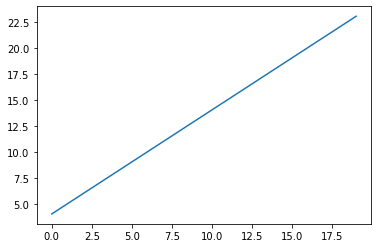

In [41]:
LVs = [float(x) for x in range(0,20)]
CCs = []
#print(recep.rijbanen[0].MWV.value)
for LV in LVs:
    recep.conc_NOx_srm2.value = LV
    calc_Emiss(recep)
    calc_concs(recep)
    CCs.append(recep.Cb['NOx'])
import matplotlib.pyplot as plt
plt.plot(LVs,CCs)

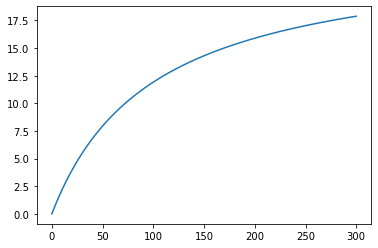

In [40]:
concs = [x/10. for x in range(3000)]
concs_no2 = []
for conc_tot_NO in concs:
       concs_no2.append(.6*recep.gcn['O3_HWN']*conc_tot_NO/(conc_tot_NO+100.))
    
plt.plot(concs,concs_no2)

First, two directories need to be supplied. 
1. dirmod: the directory where the module CARII.py is located (syntax is according to anaconda Jupyter notebook). 
2. dirin: the directory where the input files (gcn large-scale concentration files, meteorological input parameters, and the file with emission factors) are located.

The directory in which the CARII module is located needs to be appended to the directories where the jupyter notebook seeks 
for modules.

In [ ]:
#import sys
#dirmod = 'C:\\Users/ronda002\\CARII\\'
#dirin = 'C:/Users/ronda002/CARII/'
#sys.path.append(dirmod) # append dirmod to the path where python searches for modules